In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import cohend
from scipy.stats import mannwhitneyu

In [2]:
data = pd.read_csv('data/result.csv')
data2 = pd.read_csv('data/result2.csv')

data = data.drop(['Unnamed: 0'], axis=1)
data2 = data2.drop(['Unnamed: 0'], axis=1)

data = data.drop(data.loc[data['Category'] == 'others'].index)
data2 = data2.drop(data2.loc[data2['Category'] == 'others'].index)

data

,index,Category,Language,Lib,Year,Month,NewCommers
0,0,data-science,python,NumPy,2009,1,0
1,1,data-science,python,NumPy,2009,2,0
2,2,data-science,python,NumPy,2009,3,0
3,3,data-science,python,NumPy,2009,4,0
4,4,data-science,python,NumPy,2009,5,0
...,...,...,...,...,...,...,...
9715,4531,data-science,r,beepr,2017,8,1
9716,4532,data-science,r,beepr,2017,9,1
9717,4533,data-science,r,beepr,2017,10,0
9718,4534,data-science,r,beepr,2017,11,0


In [3]:
data2

,index,Category,Language,Lib,Newer,Repeat
0,0,data-science,python,NumPy,563132.0,1
1,1,data-science,python,NumPy,190280.0,1
2,2,data-science,python,NumPy,490473.0,1
3,3,data-science,python,NumPy,565888.0,1
4,4,data-science,python,NumPy,566621.0,1
...,...,...,...,...,...,...
230450,48928,data-science,r,beepr,6354827.0,1
230451,48929,data-science,r,beepr,1641862.0,1
230452,48930,data-science,r,beepr,6619250.0,1
230453,48931,data-science,r,beepr,8501772.0,1


In [4]:
dataPython = data.loc[data['Language'] == 'python', 'NewCommers'].sum()
dataR = data.loc[data['Language'] == 'r', 'NewCommers'].sum()

In [5]:
dataAllPython = data.loc[(data['Category'] == 'data-science') & (data['Language'] == 'python')]
dataAllR = data.loc[(data['Category'] == 'data-science') & (data['Language'] == 'r')]

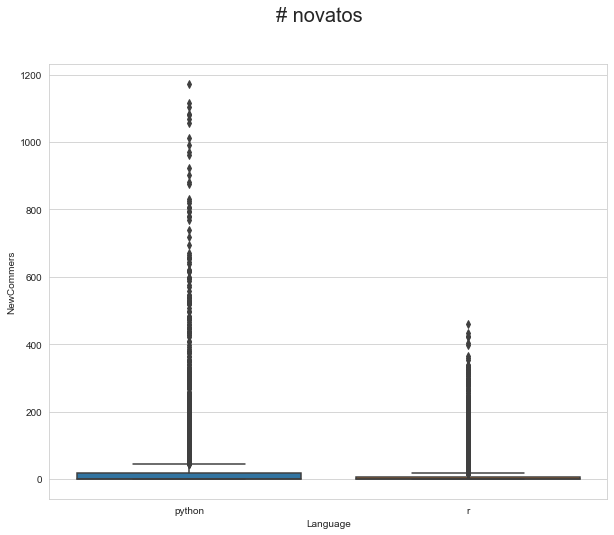

Hipotese nula rejeitada...
p:  4.231328838629008e-13
d:  0.24829889598040317 
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



In [6]:
sns.reset_orig()
sns.set_style("whitegrid")
# sns.set_context("poster")

fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=data, y='NewCommers', x='Language')
fig.suptitle('# novatos', fontsize=20)
plt.show()

U1, p = mannwhitneyu(data.loc[data['Language'] == 'python', 'NewCommers'].values.tolist(), data.loc[data['Language'] == 'r', 'NewCommers'].values.tolist())

if p < 0.05:
    print('Hipotese nula rejeitada...\np: ', p)
    d = cohend(data.loc[data['Language'] == 'python', 'NewCommers'].values.tolist(), data.loc[data['Language'] == 'r', 'NewCommers'].values.tolist())

    text = ''
    if d < 0.20:
            text = 'trivial'
    elif d >= 0.20 and d < 0.50:
        text = 'pouco significativo'
    elif d >= 0.50 and d < 0.80:
        text = 'medio significativo'
    elif d >= 0.80:
        text = 'bastante significativo'

    print('d: ', d, '\nPelo valor de "d", temos que a diferença dos conjuntos é', text, end='\n\n')


ANO DE 2011:
Hipotese nula rejeitada para o ano de 2011...
p: 1.590131538666025e-08
d: 0.4236891938509868
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo


ANO DE 2012:
Hipotese nula rejeitada para o ano de 2012...
p: 5.744265414565416e-06
d: 0.39636632055501714
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo


ANO DE 2013:
Hipotese nula rejeitada para o ano de 2013...
p: 3.46030079694816e-08
d: 0.4100675126227774
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo


ANO DE 2014:
Hipotese nula rejeitada para o ano de 2014...
p: 5.607469957430225e-09
d: 0.4239858596333384
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo


ANO DE 2015:
Hipotese nula rejeitada para o ano de 2015...
p: 2.5552205696000396e-09
d: 0.4102676973953074
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo


ANO DE 2016:
Hipotese nula rejeitada para o ano de 2016...
p: 0.000707337

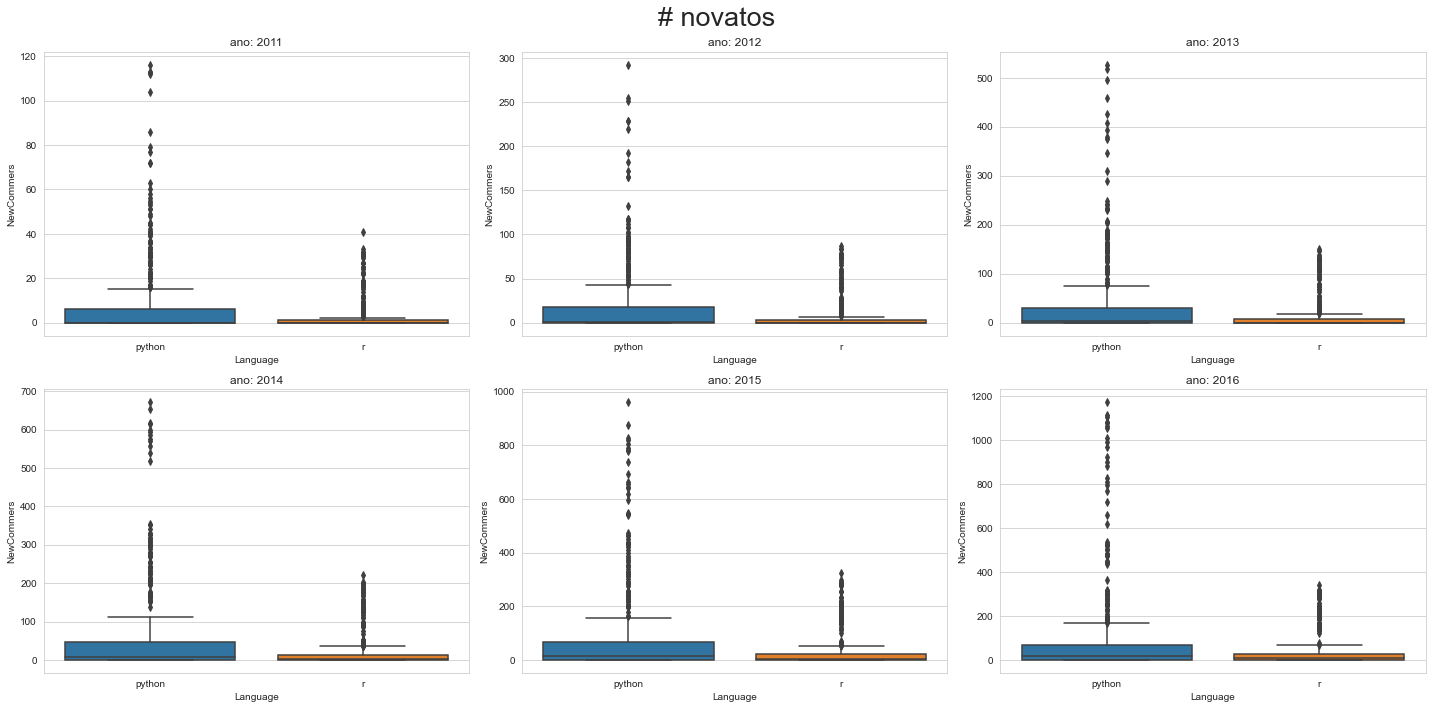

In [7]:
anoNot = [2017, 2009, 2010]

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle(f'# novatos', fontsize=27)
idx = 0
col = 0

for ano in data['Year'].unique().tolist():
    
    if ano in anoNot:
        continue

    sns.boxplot(data=data.loc[data['Year'] == ano], y='NewCommers', x='Language', ax=axs[col][idx])
    axs[col][idx].title.set_text(f"ano: {ano}")

    U1, p = mannwhitneyu(data.loc[(data['Year'] == ano) & (data['Language'] == 'python'), 'NewCommers'].values.tolist(), data.loc[(data['Year'] == ano) & (data['Language'] == 'r'), 'NewCommers'].values.tolist())

    print(f'\nANO DE {ano}:')
    if p < 0.05:
        print(f'Hipotese nula rejeitada para o ano de {ano}...\np: {p}')

        # clifdelta**
        d = cohend(data.loc[(data['Year'] == ano) & (data['Language'] == 'python'), 'NewCommers'].values.tolist(), data.loc[(data['Year'] == ano) & (data['Language'] == 'r'), 'NewCommers'].values.tolist())

        text = ''
        if d < 0.20:
                text = 'trivial'
        elif d >= 0.20 and d < 0.50:
            text = 'pouco significativo'
        elif d >= 0.50 and d < 0.80:
            text = 'medio significativo'
        elif d >= 0.80:
            text = 'bastante significativo'

        print(f'd: {d}\nPelo valor de "d", temos que a diferença dos conjuntos é {text}', end='\n\n')

    else:
        print(f'Hipotese nula não rejeitada para o ano de {ano}...\np: {p}!\n\n')

    idx += 1

    if idx == 3:
        idx = 0
        col += 1

fig.tight_layout()
plt.show()


In [8]:
dataPython2 = data2.loc[data2['Language'] == 'python']
dataR2 = data2.loc[data2['Language'] == 'r']

In [9]:
values = []
values2 = []

for lib in dataPython2['Lib'].unique().tolist():
    quantidadeNovatos = len(dataPython2.loc[dataPython2['Lib'] == lib, 'Newer'].unique())
    quantidadePerguntas = dataPython2.loc[dataPython2['Lib'] == lib, 'Repeat'].sum()

    values.append(['python', lib, quantidadeNovatos, quantidadePerguntas])

for lib in dataR2['Lib'].unique().tolist():
    quantidadeNovatos = len(dataR2.loc[dataR2['Lib'] == lib, 'Newer'].unique())
    quantidadePerguntas = dataR2.loc[dataR2['Lib'] == lib, 'Repeat'].sum()

    values.append(['r', lib, quantidadeNovatos, quantidadePerguntas])

valuesDF = pd.DataFrame(values, columns=['Language', 'Lib', 'NewCommers', 'Repeat'])


In [10]:
valuesDF

,Language,Lib,NewCommers,Repeat
0,python,NumPy,19961,35292
1,python,Keras,259,355
2,python,Pandas,9790,20638
3,python,TensorFlow,985,1443
4,python,Matplotlib,10204,15906
...,...,...,...,...
78,r,fst,429,469
79,r,devtools,1117,1419
80,r,pacman,51,68
81,r,plumber,27,30


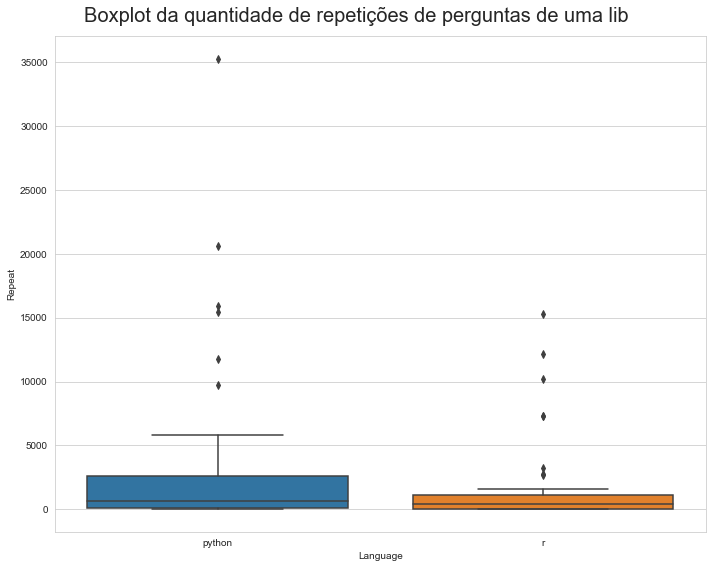

Hipotese nula não rejeitada...
p: 0.18356483540185897!




In [11]:
fig, axs = plt.subplots(figsize=(10, 8))
sns.boxplot(data=valuesDF, y='Repeat', x='Language')
fig.suptitle("Boxplot da quantidade de repetições de perguntas de uma lib", fontsize=20)
fig.tight_layout()
plt.show()

U1, p = mannwhitneyu(valuesDF.loc[valuesDF['Language'] == 'python', 'Repeat'].values.tolist(), valuesDF.loc[valuesDF['Language'] == 'r', 'Repeat'].values.tolist())

if p < 0.05:
    print('Hipotese nula rejeitada...\np: ', p)
    d = cohend(valuesDF.loc[valuesDF['Language'] == 'python', 'Repeat'].values.tolist(), valuesDF.loc[valuesDF['Language'] == 'r', 'Repeat'].values.tolist())

    text = ''
    if d < 0.20:
            text = 'trivial'
    elif d >= 0.20 and d < 0.50:
        text = 'pouco significativo'
    elif d >= 0.50 and d < 0.80:
        text = 'medio significativo'
    elif d >= 0.80:
        text = 'bastante significativo'

    print('d: ', d, '\nPelo valor de "d", temos que a diferença dos conjuntos é', text, end='\n\n')
else:
    print(f'Hipotese nula não rejeitada...\np: {p}!\n\n')

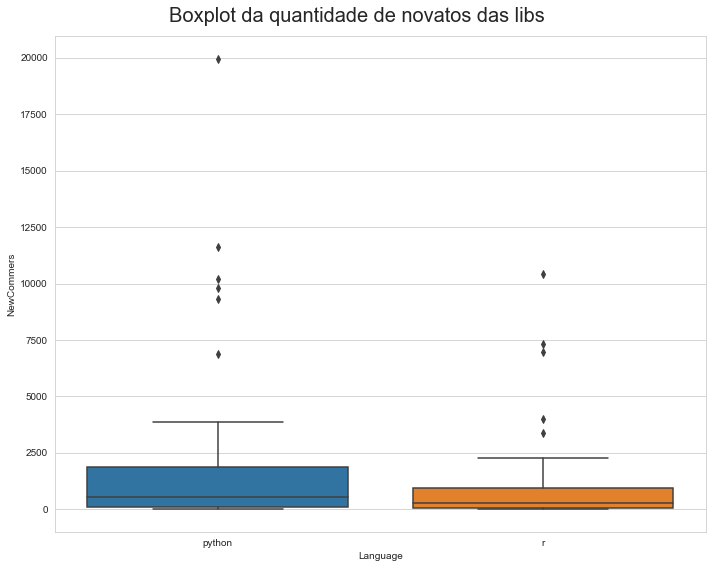

Hipotese nula não rejeitada...
p: 0.19586203754228193!




In [12]:
fig, axs = plt.subplots(figsize=(10, 8))
sns.boxplot(data=valuesDF, y='NewCommers', x='Language')
fig.suptitle("Boxplot da quantidade de novatos das libs", fontsize=20)
fig.tight_layout()
plt.show()

U1, p = mannwhitneyu(valuesDF.loc[valuesDF['Language'] == 'python', 'NewCommers'].values.tolist(), valuesDF.loc[valuesDF['Language'] == 'r', 'NewCommers'].values.tolist())

if p < 0.05:
    print('Hipotese nula rejeitada...\np: ', p)
    d = cohend(valuesDF.loc[valuesDF['Language'] == 'python', 'NewCommers'].values.tolist(), valuesDF.loc[valuesDF['Language'] == 'r', 'NewCommers'].values.tolist())

    text = ''
    if d < 0.20:
            text = 'trivial'
    elif d >= 0.20 and d < 0.50:
        text = 'pouco significativo'
    elif d >= 0.50 and d < 0.80:
        text = 'medio significativo'
    elif d >= 0.80:
        text = 'bastante significativo'

    print('d: ', d, '\nPelo valor de "d", temos que a diferença dos conjuntos é', text, end='\n\n')
else:
    print(f'Hipotese nula não rejeitada...\np: {p}!\n\n')